In [ ]:
#!pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=40107a5cfbd6d1b44c53ea4c55b8080587e0d7476c68e1f940c1cec9292ad089
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


# Preparing The Data

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
print(data_dir)

C:\Users\user\.keras\datasets\flower_photos


C:\Users\user\.keras\datasets\flower_photos\roses\102501987_3cdb8e5394_n.jpg


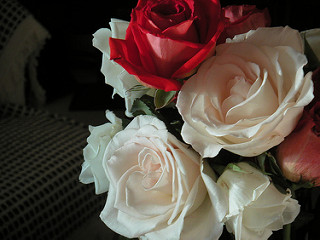

In [ ]:
roses = list(data_dir.glob('roses/*'))
print(roses[1])
PIL.Image.open(str(roses[1]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


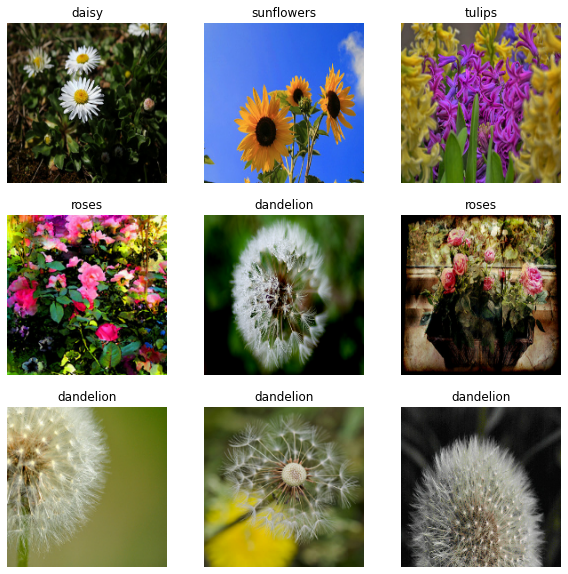

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Training The Model

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 96s 1s/step - loss: 0.7046 - accuracy: 0.7881 - val_loss: 0.4100 - val_accuracy: 0.8583
Epoch 2/10
92/92 [==============================] - 89s 974ms/step - loss: 0.2965 - accuracy: 0.8934 - val_loss: 0.3345 - val_accuracy: 0.8692
Epoch 3/10
92/92 [==============================] - 90s 980ms/step - loss: 0.1785 - accuracy: 0.9360 - val_loss: 0.3798 - val_accuracy: 0.8583
Epoch 4/10
92/92 [==============================] - 90s 983ms/step - loss: 0.1031 - accuracy: 0.9683 - val_loss: 0.4385 - val_accuracy: 0.8474
Epoch 5/10
92/92 [==============================] - 93s 1s/step - loss: 0.0563 - accuracy: 0.9850 - val_loss: 0.4003 - val_accuracy: 0.8733
Epoch 6/10
92/92 [==============================] - 93s 1s/step - loss: 0.0311 - accuracy: 0.9959 - val_loss: 0.4201 - val_accuracy: 0.8719
Epoch 7/10
92/92 [==============================] - 92s 997ms/step - loss: 0.0259 - accuracy: 0.9935 - val_loss: 0.4369 - val_accuracy: 0.8842
Epoch 8/10
92/92 [=

# Evaluating The Model

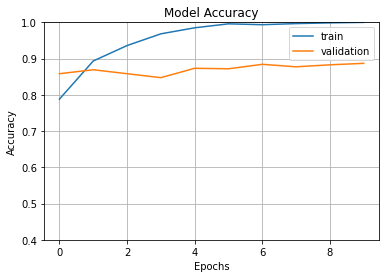

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


Model Loss

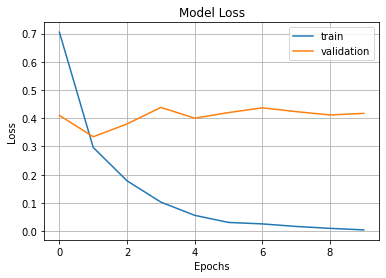

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making Predictions

In [ ]:
!pip install opencv-python

import os
os.sys.path

import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


Prediction based on model

In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 897ms/step
[[0.09923014 0.02218131 0.07329107 0.7654238  0.03987369]]


The predicted class is sunflowers


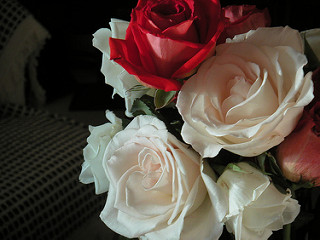

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)
# PIL.Image.open(str(roses[1]))